In [0]:
#import
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
#import lightgbm as lgb
from scipy import stats
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
import math
from scipy.stats import stats
from scipy.stats import kurtosistest
from numpy.random import choice
from scipy.stats import kurtosis

In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
map_object_cols={}

map_object_cols['ProductCD']='object'
map_object_cols['DeviceInfo']='object'
map_object_cols['DeviceType']='object'
map_object_cols['addr1']='object'
map_object_cols['addr2']='object'
map_object_cols['device_name']='object'
map_object_cols['had_id']='object'

map_object_cols['P_emaildomain']='object'
map_object_cols['P_emaildomain_bin']='object'
map_object_cols['P_emaildomain_suffix']='object'
map_object_cols['R_emaildomain']='object'
map_object_cols['R_emaildomain_bin']='object'
map_object_cols['R_emaildomain_suffix']='object'

map_object_cols['_Month']='object'
map_object_cols['_Weekdays']='object'
map_object_cols['_Days']='object'
map_object_cols['_Hours']='object'

for i in range(12,39):
  col_name= 'id_'+str(i)
  map_object_cols[col_name]='object'

for i in range(1,10):
  col_name= 'M'+str(i)
  map_object_cols[col_name]='object'

for i in range(1,7):
  col_name= 'card'+str(i)
  map_object_cols[col_name]='object'

In [0]:
train=pd.read_csv('gdrive/My Drive/Colab Notebooks/Fraud/Data/v4_filterNulls_fill_mean_mode.csv', compression='gzip', dtype=map_object_cols)

In [0]:
train.isnull().sum().sum()

0

In [0]:
train.shape

(590540, 368)

In [0]:
train3=train.copy()

In [0]:
df_numeric=train._get_numeric_data()
df_numeric.drop('isFraud', axis=1,inplace=True)
numeric_cols=list(df_numeric.columns)
len(numeric_cols)

321

In [0]:
df_numeric

,TransactionAmt,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,...,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11
0,68.50,19.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,170.0,13.0,140.0,42.0,13.0,13.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,117.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325
1,29.00,119.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,170.0,28.0,0.0,42.0,0.0,147.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325
2,59.00,287.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,170.0,28.0,0.0,42.0,0.0,315.0,315.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325
3,50.00,119.0,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,84.0,147.0,111.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,4.0,0.0,0.0,1.0,1.0,1.0,1.0,38.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.000000,1758.000000,925.000000,0.0,354.000000,0.0,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325
4,50.00,119.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,170.0,28.0,140.0,42.0,124.0,147.0,164.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,70787.0,2.0,-7.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,49.00,48.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,140.0,42.0,56.0,56.0,56.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325
590536,39.50,119.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,170.0,28.0,0.0,42.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325
590537,30.95,119.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,170.0,28.0,0.0,42.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325
590538,117.00,3.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,0.0,1

In [0]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.05)
    q3 = df_in[col_name].quantile(0.95)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    
    if iqr>0:
      kurt_value=kurtosis(df_in[col_name])
      if(abs(kurt_value)<4):
        #print(col)
        statistic,p_value = kurtosistest(df_in[col_name])
        df_out = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
        print(col_name,"cardinality: "+str(df_in[col_name].nunique()),"iqr:" +str(iqr),"kurtosis value "+str(kurt_value),"#outliers:"+str(len(set(df_out.index))),"(fence_low,fence_high): (" +str(fence_low)+","+str(fence_high)+")")
        #print("(statistic,p_value) :", "("+str(statistic)+','+str(p_value)+")")
        return set(df_out.index)
    return set()

In [0]:
outliers=set()
for col in df_numeric.columns:
  outliers_indexes=remove_outlier(df_numeric,col)
  outliers=outliers.union(outliers_indexes)
print('There are total ' +str(len(outliers))+' outliers')

D1 cardinality: 641 iqr:489.0 kurtosis value 2.209491302472257 #outliers:0 (fence_low,fence_high): (-733.5,1222.5)
D2 cardinality: 641 iqr:479.0 kurtosis value 2.3890509945768805 #outliers:0 (fence_low,fence_high): (-715.5,1200.5)
D4 cardinality: 808 iqr:516.0 kurtosis value 1.1576985459069524 #outliers:0 (fence_low,fence_high): (-774.0,1290.0)
D10 cardinality: 818 iqr:522.0 kurtosis value 1.1534771814585731 #outliers:0 (fence_low,fence_high): (-783.0,1305.0)
D11 cardinality: 676 iqr:469.0 kurtosis value 2.201553466575306 #outliers:0 (fence_low,fence_high): (-703.5,1172.5)
D15 cardinality: 859 iqr:553.0 kurtosis value -0.08944451812093446 #outliers:0 (fence_low,fence_high): (-829.5,1382.5)
V10 cardinality: 5 iqr:1.0 kurtosis value 0.8021323098948949 #outliers:187 (fence_low,fence_high): (-1.5,2.5)
V11 cardinality: 6 iqr:1.0 kurtosis value 3.057634958791426 #outliers:800 (fence_low,fence_high): (-1.5,2.5)
V12 cardinality: 4 iqr:1.0 kurtosis value -1.4439170579529321 #outliers:120 (fence

(array([5.88521e+05, 2.36000e+02, 5.70000e+02, 4.49000e+02, 2.15000e+02,
        4.30000e+01, 6.20000e+01, 2.10000e+02, 9.20000e+01, 1.42000e+02]),
 array([   0. ,  318.8,  637.6,  956.4, 1275.2, 1594. , 1912.8, 2231.6,
        2550.4, 2869.2, 3188. ]),
 <a list of 10 Patch objects>)

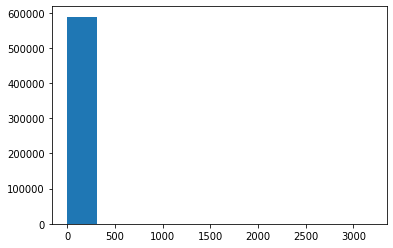

In [0]:
plt.hist(train['C11'])

In [0]:
len(outliers)

5916

In [0]:
#Remove outliers
df_out= train.drop(train.index[list(outliers)])

In [0]:
df_out

,isFraud,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D10,D11,D15,M1,M2,M3,M4,...,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,_Weekdays,_Hours,_Days,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix,device_name,had_id,_Month
0,0,68.50,W,13926,321.0,150.0,discover,142.0,credit,315.0,87.0,19.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,170.0,13.0,140.0,42.0,13.0,13.0,0.0,T,T,T,M2,...,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325,NotFound,52.0,Found,Found,166.0,266.0,507.0,Found,Found,Chrome,T,F,T,F,desktop,Windows,5,0,2,google,com,google,com,Windows,1,12
1,0,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,119.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,170.0,28.0,0.0,42.0,0.0,147.0,0.0,T,T,T,M0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325,NotFound,52.0,Found,Found,166.0,266.0,507.0,Found,Found,Chrome,T,F,T,F,desktop,Windows,5,0,2,google,com,google,com,Windows,1,12
2,0,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,outlook.com,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,170.0,28.0,0.0,42.0,0.0,315.0,315.0,T,T,T,M0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325,NotFound,52.0,Found,Found,166.0,266.0,507.0,Found,Found,Chrome,T,F,T,F,desktop,Windows,5,0,2,microsoft,com,google,com,Windows,1,12
3,0,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,119.0,yahoo.com,gmail.com,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,84.0,147.0,111.0,T,T,T,M0,...,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325,NotFound,52.0,Found,Found,166.0,266.0,507.0,Found,Found,Chrome,T,F,T,F,desktop,Windows,5,0,2,yahoo,com,google,com,Windows,1,12
4,0,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,119.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,170.0,28.0,140.0,42.0,124.0,147.0,164.0,T,T,T,M0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,70787.0,2.0,-7.0,100.000000,NotFound,52.0,New,NotFound,166.0,542.0,144.0,New,NotFound,Samsung,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,5,0,2,google,com,google,com,Samsung,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,0,49.00,W,6550,321.0,150.0,visa,226.0,debit,272.0,87.0,48.0,gmail.com,gmail.com,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,140.0,42.0,56.0,56.0,56.0,T,T,T,M0,...,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325,NotFound,52.0,Found,Found,166.0,266.0,507.0,Found,Found,Chrome,T,F,T,F,desktop,Windows,4,23,1,google,com,google,com,Windows,1,6
590536,0,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,119.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,170.0,28.0,0.0,42.0,0.0,0.0,0.0,T,F,F,M0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,-10.0,174717.0,2.0,-7.0,99.745325,NotFound,52.0,Found,Found,166.0,266.0,507.0,Found,Found,Chrome,T,F,T,F,desktop,Windows,4,23,1,google,com,google,com,Windows,1,6
590537,0,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,87.0,119.0,gmail.com,gmail.com,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1

In [0]:
df_out['isFraud'].value_counts(dropna=False)

0    564517
1     20107
Name: isFraud, dtype: int64

In [0]:
#df_out.to_csv('gdrive/My Drive/Colab Notebooks/Fraud/Data/v17_filterNulls_fill_mean_mode_withisNullColumns_removeOutliers.csv',index=False,compression='gzip')
#df_out.to_csv('gdrive/My Drive/Colab Notebooks/Fraud/Data/v11_filterNulls_fillDistribution_removeOutliers.csv',index=False,compression='gzip')